In [1]:
import numpy as np
import matplotlib.pyplot as plot
from matplotlib.patches import Circle

# Visualizing a Magnetic Dipole Field

A magnet has both a north and a south pole, and as far as we can tell these are inseparable in our universe.  An **ideal magnetic dipole** is an elementary point sized magnet possessing a north and a south pole.  It is represented mathematically as a **vector *dipole moment*** $\vec{m}$ that indicates the axis of the magnet, pointing in the direction of the dipole's magnetic north.

The magnetic field in space is a vector field created by the magnetic dipole.  It can be written *exactly* (without approximation) as:

$$\vec{B}(\vec{m},\vec{r}) = \frac{\mu_0}{4\pi}\frac{ 3(\vec{m}\cdot\hat{r})\hat{r} - \vec{m} }{r^3}  $$ 

where

$\vec{r}$ is the vector from the position of the dipole to the position where you are calculating the $\vec{B}$ field.
$r$ is the distance from the dipole to the position you are calculating the field.
$\hat{r} = \vec{r}/r$ is the unit vector pointing in the direction of $\vec{r}$.


## Below, let's define a function that returns $\vec{B}$ given inputs.


In [2]:
#Attribution to Michal Rawlik for many aspects of the nicely compact approach
#shown below to calculating the vector dipole field!

def magdipole(m, r, r0):
    '''Calculate the field at point r from a dipole with moment m located
    at point r0.  In this case m, r, and r0 are vectors represented
    either tuples or NumPy arrays (can use either one).'''
    
    R = np.subtract(np.transpose(r), r0).T
    
    #Find norm of R. Use einstein summation to make sure it happens
    # properly.  With meshgrid type coordinate arrays, the built-in
    #numpy functions don't do what we expect.
    Rnorm = np.sqrt( np.einsum("i...,i...", R, R))
    
    
    #Find the unit vector pointing towards
    #the location we want to calculate field at.
    Rhat = R/Rnorm
    
    #The default np.dot() function also falls down with
    # big meshes of coordinates because it doesn't understand
    # what it needs to sum over.  Need to use np.tensordot()
    m_dot_Rhat = np.tensordot(m, Rhat, axes=1)
    
    
    #Using np.tensordot() with axes=0 does an outer 
    #product [no summation involved]
    B = 3*(m_dot_Rhat*Rhat)/Rnorm**3 - np.tensordot(m,1/Rnorm**3, axes=0)
    
    #Now rescale by mu_0/4 pi, permeability constant
    B *=1e-7
    
    return B
    
    

# Now let's set up our meshgrid coordinates and visualize this field.

In [3]:
#Set up a 2D meshgrid, simulating a plane slice through the dipole field.
# x, y points
nx, ny = 64, 64
extent0 = -2
extent1 = 2

x = np.linspace(extent0, extent1, nx)
y = np.linspace(extent0, extent1, ny)
X, Y = np.meshgrid(x,y)




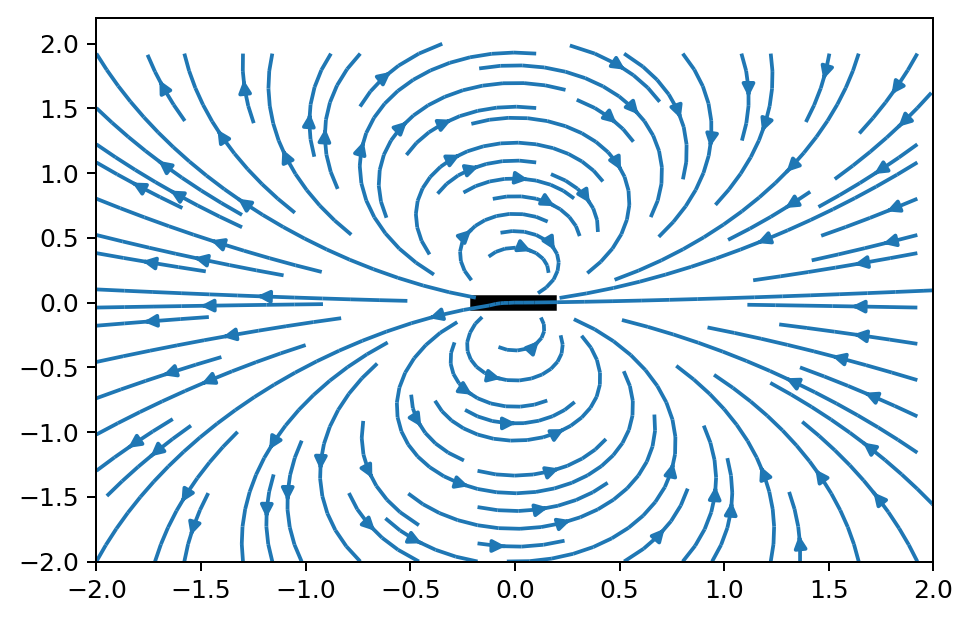

In [93]:
#Simulate a single dipole at the origin.
from matplotlib import patches

BX, BY = magdipole(m=[-0.1, 0], r=(X,Y), r0=[0,0])

%matplotlib inline
plot.figure(dpi=180)

#Create a rectangle where the bar magnet is.
rect = patches.Rectangle([-0.21,-0.05], width=0.4, height=0.1, angle=0.0, edgecolor='k',facecolor='k', fill=True)

#Plot the lines of force.
plot.streamplot(X, Y, BX, BY)

#Put the rectangle in the plot.
ax = plot.gca()
ax.add_patch(rect)


plot.show()

# This is the classic magnetic dipole field.

## Question 1.  

After reviewing your Electric charge plotting activity from early in the semester, create a **vector plot** of the same field above.

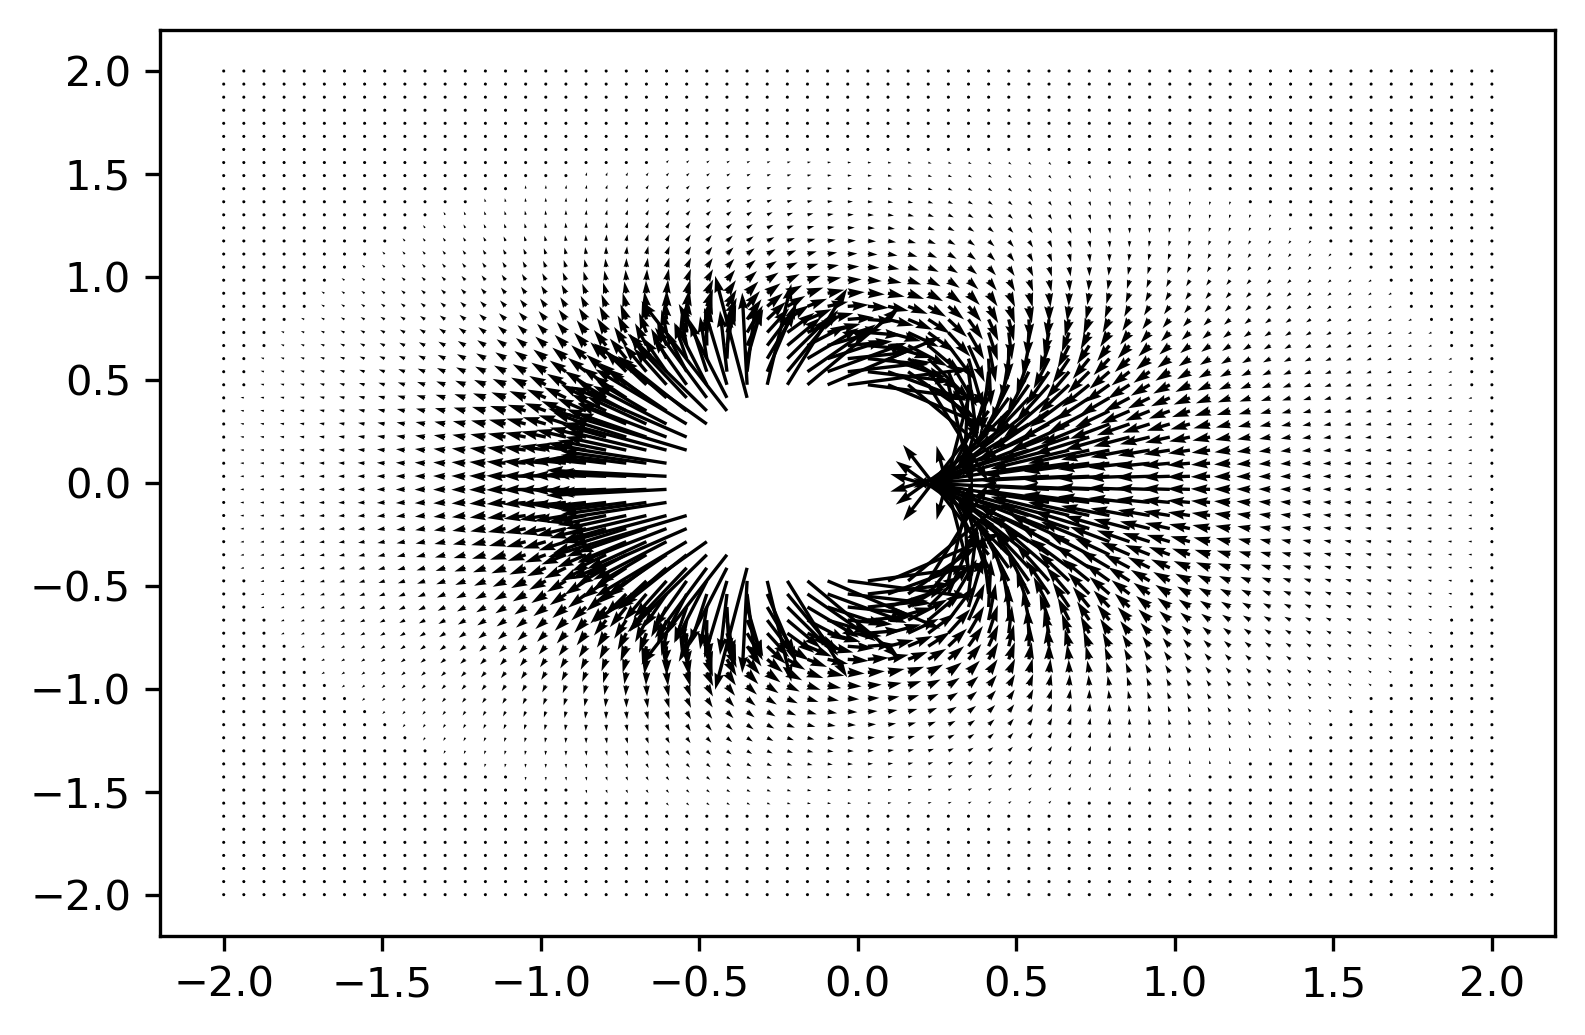

In [106]:
m = 0.0000001
Bxx = np.ma.masked_outside(BX, -m, m)
Byy = np.ma.masked_outside(BY, -m, m)

plot.figure(dpi=300)
plot.quiver(x,y,Bxx,Byy, angles='xy')
plot.show()

## Question 2

Calculate and visualize the streamplot for a new magnetic field where the bar magnet is tilted at a 45 degree angle.

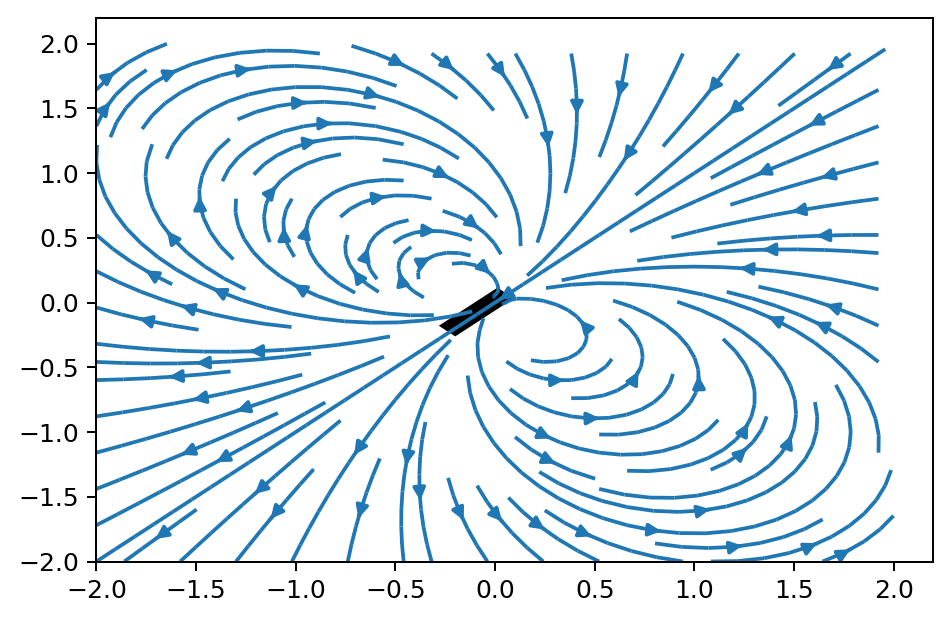

In [11]:
from matplotlib import patches

BX, BY = magdipole(m=[-0.05*(2**0.5), -0.05*(2**0.5)], r=(X,Y), r0=[0,0])

%matplotlib inline
plot.figure(dpi=180)

#Create a rectangle where the bar magnet is.
rect = patches.Rectangle([-0.20, -0.25], width=0.4, height=0.1, angle=45.0, 
                         edgecolor='k',facecolor='k', fill=True)

#Plot the lines of force.
plot.streamplot(X, Y, BX, BY)

#Put the rectangle in the plot.
ax = plot.gca()
ax.add_patch(rect)


plot.show()

## Let's plot a slice through the field from our first (horizontally oriented) bar magnet.

In [26]:
#Now let's find field values along a vertical slice near the end of the magnet.

#Remember the first index is ROWS (vertical direction in the field) 
# and the second index is COLUMNS (horizontal position in the field)
Xslice = X[:,16]
Yslice = Y[:,16]

#Calculate the field vectors along this slice.
Bxslice, Byslice = magdipole(m=[-0.1, 0], r=(Xslice,Yslice), r0=[0,0])

#This gives 2 arrays:  the B field's x and y vector components
#at each point along the vertical slice through the field.

#We can turn these into a list of [Bx,By] field vectors by taking
#the transpose of the two taken as a single array:
Bvectors = np.array([Bxslice,Byslice]).T

print(Bvectors)

[[ 3.74914473e-10 -1.07309423e-09]
 [ 3.74873120e-10 -1.18213186e-09]
 [ 3.70536838e-10 -1.30412805e-09]
 [ 3.60659474e-10 -1.44073540e-09]
 [ 3.43687659e-10 -1.59380088e-09]
 [ 3.17688801e-10 -1.76537554e-09]
 [ 2.80263569e-10 -1.95771739e-09]
 [ 2.28440395e-10 -2.17328367e-09]
 [ 1.58549692e-10 -2.41470628e-09]
 [ 6.60760963e-11 -2.68474236e-09]
 [-5.45115739e-11 -2.98618882e-09]
 [-2.09950383e-10 -3.32174610e-09]
 [-4.08386701e-10 -3.69381188e-09]
 [-6.59579258e-10 -4.10418124e-09]
 [-9.75077299e-10 -4.55362497e-09]
 [-1.36833366e-09 -5.04131573e-09]
 [-1.85469111e-09 -5.56407334e-09]
 [-2.45115282e-09 -6.11541087e-09]
 [-3.17581608e-09 -6.68438741e-09]
 [-4.04681806e-09 -7.25431920e-09]
 [-5.08062460e-09 -7.80147597e-09]
 [-6.28950817e-09 -8.29399694e-09]
 [-7.67813823e-09 -8.69139670e-09]
 [-9.23937967e-09 -8.94516794e-09]
 [-1.09496889e-08 -9.00107015e-09]
 [-1.27649015e-08 -8.80363146e-09]
 [-1.46176387e-08 -8.30307849e-09]
 [-1.64178450e-08 -7.46427828e-09]
 [-1.80578485e-08 -6

In [27]:
#Now let's find the magnitude of this B field at each point in the slice.

# We need to specify do find normals along only the innermost 
#"axis" of the array (viz, each [x,y] vector)
#because
#otherwise the "norm" function will do a sum of ALL the field 
#vectors and spit out a single value, which is not correct.
Bmagnitudes = np.linalg.norm(Bvectors, axis=-1)

print(Bmagnitudes)

[1.13670229e-09 1.24014740e-09 1.35574611e-09 1.48519148e-09
 1.63043628e-09 1.79373269e-09 1.97767668e-09 2.18525672e-09
 2.41990587e-09 2.68555536e-09 2.98668632e-09 3.32837442e-09
 3.71631887e-09 4.15684357e-09 4.65685260e-09 5.22371527e-09
 5.86504827e-09 6.58835338e-09 7.40046234e-09 8.30673723e-09
 9.30998247e-09 1.04090489e-08 1.15971627e-08 1.28600998e-08
 1.41744471e-08 1.55063419e-08 1.68112008e-08 1.80349962e-08
 1.91175007e-08 1.99975686e-08 2.06199542e-08 2.09425562e-08
 2.09425562e-08 2.06199542e-08 1.99975686e-08 1.91175007e-08
 1.80349962e-08 1.68112008e-08 1.55063419e-08 1.41744471e-08
 1.28600998e-08 1.15971627e-08 1.04090489e-08 9.30998247e-09
 8.30673723e-09 7.40046234e-09 6.58835338e-09 5.86504827e-09
 5.22371527e-09 4.65685260e-09 4.15684357e-09 3.71631887e-09
 3.32837442e-09 2.98668632e-09 2.68555536e-09 2.41990587e-09
 2.18525672e-09 1.97767668e-09 1.79373269e-09 1.63043628e-09
 1.48519148e-09 1.35574611e-09 1.24014740e-09 1.13670229e-09]


## Finally let's plot the magnitude of the B field along the slice we've taken

You should be able to see from inspecting our Xslice and Yslice that this slice is around x = -0.9, and goes from y = -2 to + 2.

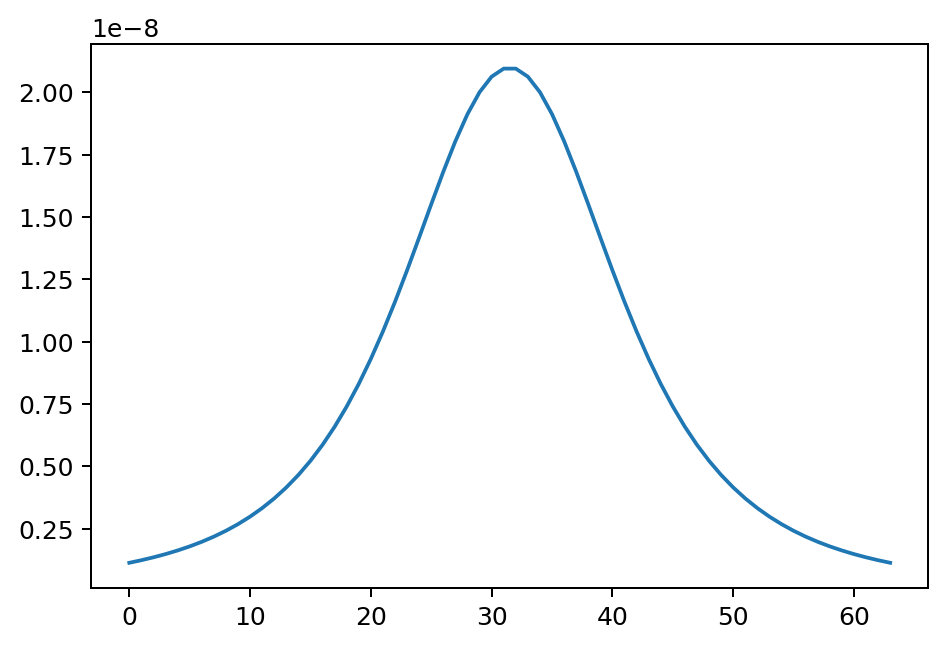

In [28]:
#Let's plot this
%matplotlib inline
plot.figure(dpi=180)
plot.plot(Bmagnitudes)

## Final coding task:

- Load up your Faraday's Law data obtained using WebPlotDigitizer.  Plot it below.

- Now write a function which takes the Riemann Sum of this data and stores the incremental results of the sum (at each step) into an array.  This will approximate taking the integral of your data as a function of x.  

- Plot the result.  You may use left-hand rule, right-hand rule or (recommended / more accurate) Trapezoid rule.  

- Compare your plot to the field magnitude plot above.  

- What are your observations?  What is your explanation?

- If there is a difference of scaling it is simply because we calculated field for a magnet with a different strength than the one you actually used, and
have not actually measured the area through which flux occurs.  This means there will be a scaling constant.  Can your rescale your integral (e.g. multiply the array by some factor) and plot on top of the above plot to see if you can get them to match?



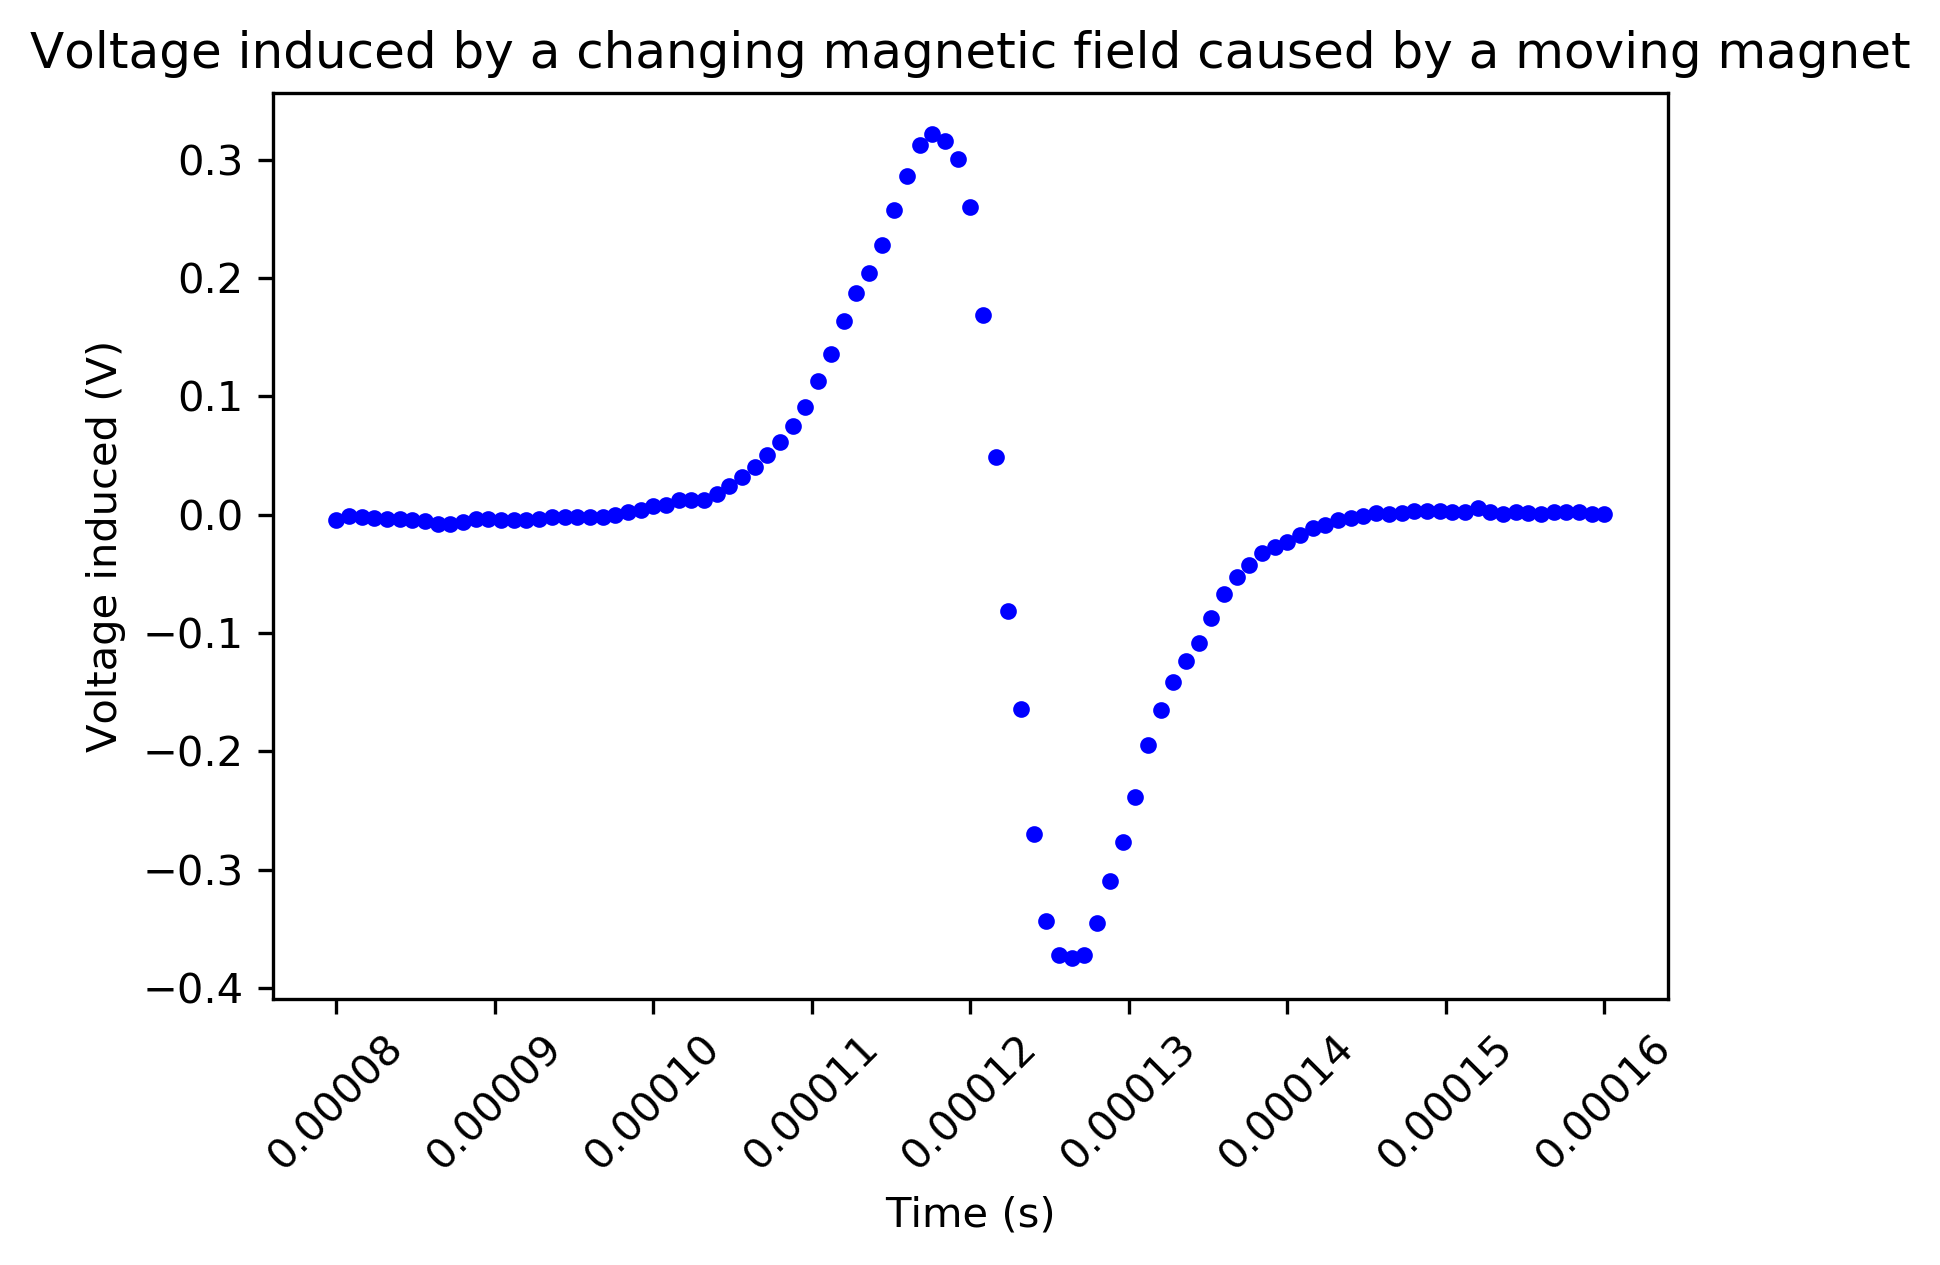

In [25]:
datum = np.loadtxt('Default Dataset.csv', delimiter=',')
xset = datum[:,0]
yset = datum[:,1]
plot.figure(dpi=300)
plot.title("Voltage induced by a changing magnetic field caused by a moving magnet")
plot.ylabel("Voltage induced (V)")
plot.xlabel("Time (s)")
plot.xticks(rotation=45)
plot.plot(xset, yset, 'b.')
plot.show()

In [15]:
partialSums = np.array([])
aveX = np.array([])
sums = 0
for i in range(len(xset) - 1):
    sums = sums + 0.5*(yset[i] + yset[i+1])*(xset[i+1] - xset[i])
    ave = (xset[i+1] + xset[i])*0.5
    partialSums = np.append(partialSums, sums)
    aveX = np.append(aveX, ave)

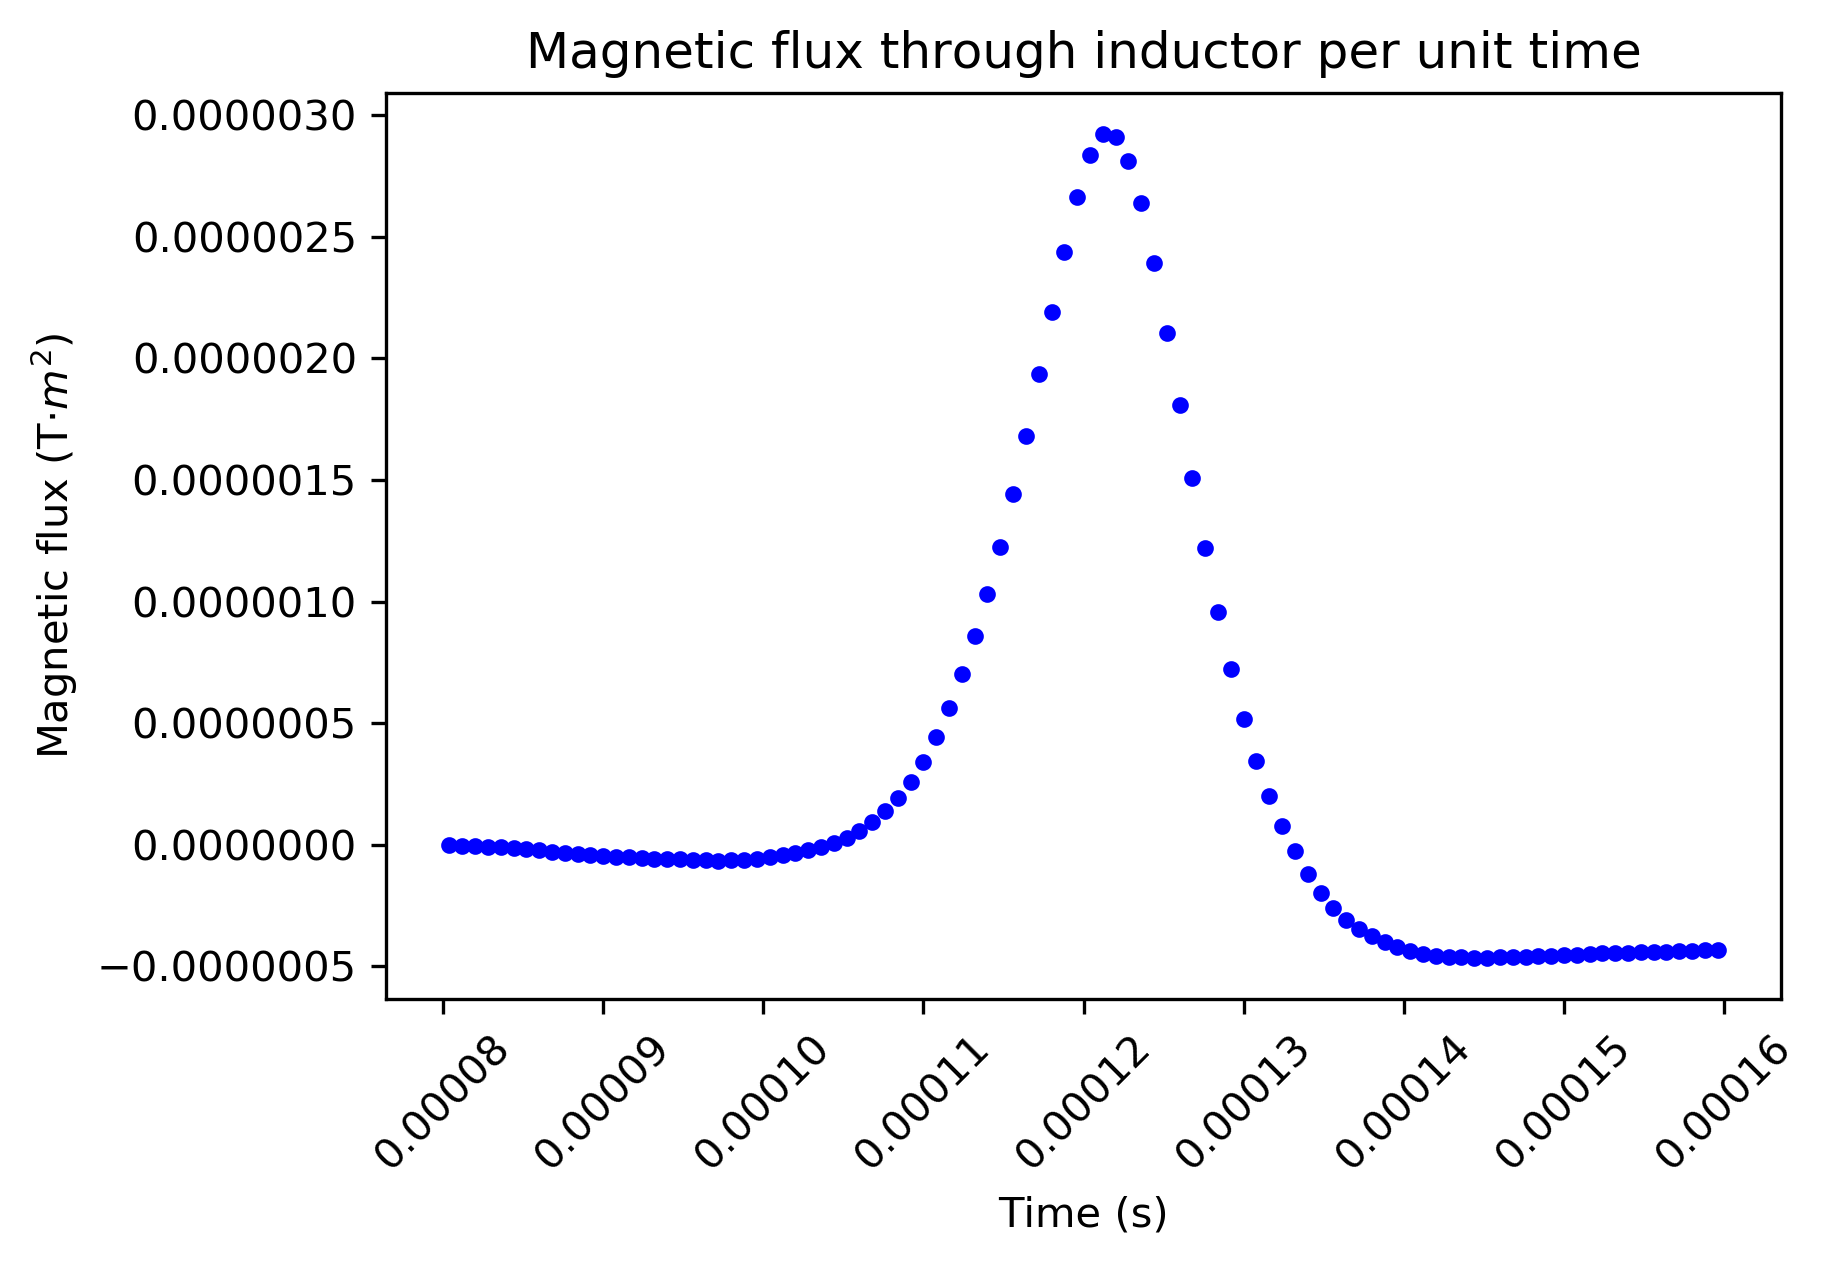

In [22]:
plot.figure(dpi=300)
plot.title("Magnetic flux through inductor per unit time")
plot.ylabel(r'Magnetic flux (T$\cdot m^2$)')
plot.xlabel("Time (s)")
plot.xticks(rotation=45)
plot.plot(aveX, partialSums, 'b.')
plot.show()

The plot has the same shape as the graph of the B field along the slice. This is because when the magnet passes by an inductor, the flux through the inductor is directly proportional to the strength of the magnetic field. there seems to be a scaling constant on the order of 10^-3 due to the flux also being proportional to the cross-sectional area of the inductor.

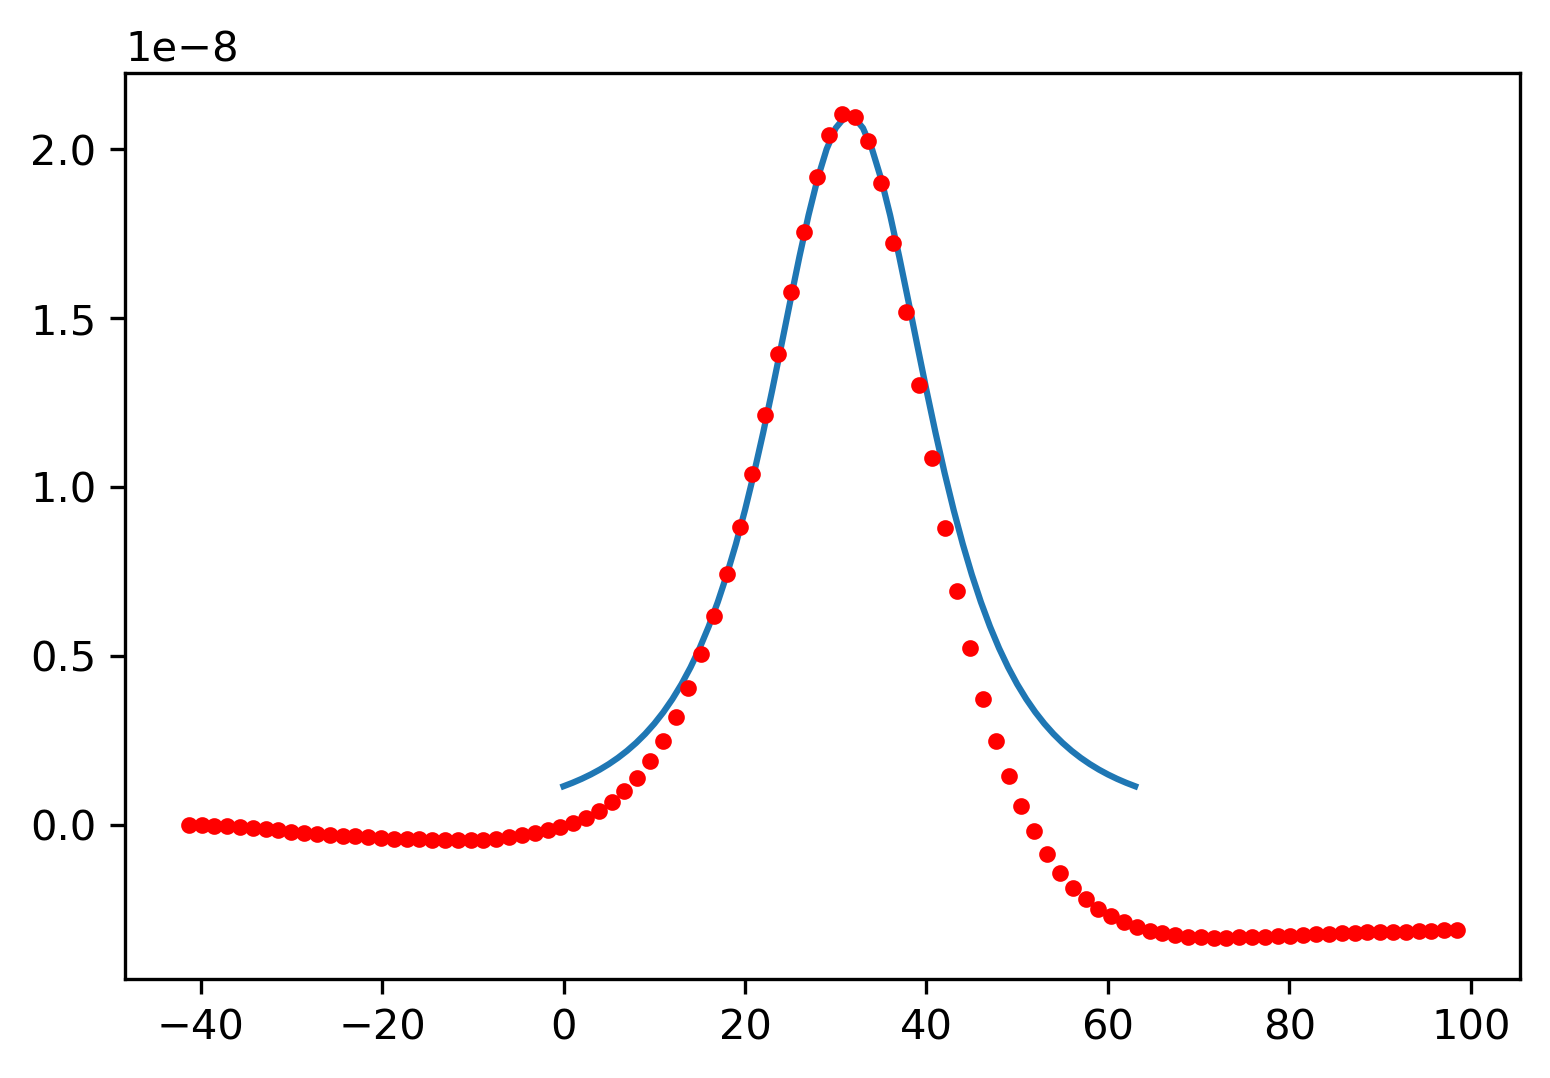

In [69]:
plot.figure(dpi=300)
plot.plot(Bmagnitudes)
plot.plot(60*(aveX-.00008)/.000034 - 42, .0072*partialSums, 'r.')